## Изучение общей информации

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
users = pd.read_csv('users.csv')
calls = pd.read_csv('calls.csv')
messages = pd.read_csv('messages.csv')
internet = pd.read_csv('internet.csv')
tariffs = pd.read_csv('tariffs.csv')

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
users.churn_date.value_counts() 

2018-12-03    2
2018-10-03    2
2018-10-14    2
2018-12-09    2
2018-12-21    2
2018-12-30    1
2018-10-28    1
2018-11-26    1
2018-11-27    1
2018-11-16    1
2018-10-27    1
2018-10-05    1
2018-09-27    1
2018-11-13    1
2018-12-25    1
2018-12-14    1
2018-12-24    1
2018-09-26    1
2018-11-22    1
2018-08-17    1
2018-10-04    1
2018-09-02    1
2018-12-18    1
2018-11-30    1
2018-12-20    1
2018-12-16    1
2018-11-07    1
2018-12-23    1
2018-08-31    1
2018-12-26    1
2018-12-11    1
2018-11-21    1
2018-10-25    1
Name: churn_date, dtype: int64

In [6]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [7]:
users.describe(include = 'object')

,churn_date,city,first_name,last_name,reg_date,tariff
count,38,500,500,500,500,500
unique,33,76,246,419,270,2
top,2018-12-03,Москва,Радим,Андреенко,2018-05-28,smart
freq,2,99,6,5,8,351


In [8]:
users.duplicated().sum()

0

В датафрейме `users` будет необходимо заменить тип данных в столбце `reg_date`. NaN в столбце `churn_date` указывают на то, что тариф все еще действовал на момент создания записи.

In [9]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [11]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [12]:
calls.describe(include = 'object')

,id,call_date
count,202607,202607
unique,202607,365
top,1000_0,2018-12-31
freq,1,1435


In [13]:
calls.duplicated().sum()

0

В датафрейме `calls` также необходимо изменить тип данных в столбце `call_date`. NaN не обнаружены. Звонки с продолжительностью 0 минут обозначают пропущенные вызовы. Для статистического анализа придется просмотреть столбец `duration`, так как в нем есть значения, сильно отличающиеся от среднего

In [14]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [16]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [17]:
messages.describe(include = 'object')

,id,message_date
count,123036,123036
unique,123036,364
top,1000_0,2018-12-31
freq,1,859


In [18]:
messages.duplicated().sum()

0

Пропущенных значений нет, исправить формат данных в столбце `message_date`.

In [19]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [21]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [22]:
internet.describe(include = 'object')

,id,session_date
count,149396,149396
unique,149396,365
top,1000_0,2018-12-31
freq,1,1057


In [23]:
internet.duplicated().sum()

0

NaN не обнаружены, лишний столбец с индексами, неверный формат даты, проверить данные по столбцу `mb_used`, в котором есть выдающиеся значения


In [24]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [25]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


С `tariffs` все в порядке

### Выводы

Необходимо:  
1) Изменить типы данных в столбцах, указывающих дату  
2) Проверить выдающиеся значения

## Подготовка данных к анализу

### Предобработка данных

Приведем данные к нужному типу

In [26]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')  
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [27]:
users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

Удалим лишний столбец из таблицы `internet`

In [28]:
internet = internet.drop('Unnamed: 0', axis = 1)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Добавление столбцов 

Для каждого пользователя (`id` в датафрейме `users`) посчитаем и создадим сводную таблицу:
* Количество сделанных звонков и израсходованных минут разговора по месяцам;
* Количество отправленных сообщений по месяцам;
* Объем израсходованного интернет-трафика по месяцам;
* Помесячную выручку с каждого пользователя.

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

Добавим в датфрейм `calls` столбец с названием месяца,столбец для подсчета количества звонков, переименуем столбец для лучшего отображения смысла данных

In [29]:
calls['month'] = calls['call_date'].dt.month
calls['call_count'] = 1
calls = calls.rename({'duration' : 'call_duration'}, axis = 1) #переименуем столбец для лучшего отображения смысла данных
calls['call_duration'] = calls['call_duration'].apply(np.ceil).astype(int) #округляем значения до целых минут
calls.head()

,id,call_date,call_duration,user_id,month,call_count
0,1000_0,2018-07-25,0,1000,7,1
1,1000_1,2018-08-17,0,1000,8,1
2,1000_2,2018-06-11,3,1000,6,1
3,1000_3,2018-09-21,14,1000,9,1
4,1000_4,2018-12-15,6,1000,12,1


Создадим сводную таблицу по `user_id` и `month`, где для столбцов `call_duration` и `call_count` посчитаем сумму и количество соответственно

In [30]:
calls_count = calls.pivot_table(index = ('user_id', 'month'), values =  'call_count', aggfunc = 'count')
calls_count = calls_count.reset_index()
calls_count.head()

,user_id,month,call_count
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58


In [31]:
calls_duration = calls.pivot_table(index = ('user_id', 'month'), values =  'call_duration', aggfunc = 'sum')
calls_duration = calls_duration.reset_index()
calls_duration.head()

,user_id,month,call_duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


#### Количество отправленных сообщений по месяцам

Повторим те же действия для таблицы `messages`

In [32]:
messages['month'] = messages['message_date'].dt.month
messages['message_count'] = 1
messages.head()

,id,message_date,user_id,month,message_count
0,1000_0,2018-06-27,1000,6,1
1,1000_1,2018-10-08,1000,10,1
2,1000_2,2018-08-04,1000,8,1
3,1000_3,2018-06-16,1000,6,1
4,1000_4,2018-12-05,1000,12,1


In [33]:
messages_sum = messages.pivot_table(index = ('user_id', 'month'), values =  'message_count', aggfunc = 'sum')
messages_sum = messages_sum.reset_index()
messages_sum.head()

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### Объем израсходованного интернет-трафика по месяцам

In [34]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [35]:
internet_sum = internet.pivot_table(index = ('user_id', 'month'), values =  'mb_used', aggfunc = 'sum')
internet_sum = internet_sum.reset_index()
internet_sum

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


#### Помесячная выручка с каждого пользователя

Подготовим данные к объединению  
Изменим столбец `mb_per_month_included` в `gb_per_month_included` и разделим данные на 1024

In [36]:
tariffs = tariffs.rename({'mb_per_month_included' : 'gb_per_month_included'}, axis = 1)
tariffs['gb_per_month_included'] =  tariffs['gb_per_month_included'] / 1024
tariffs['gb_per_month_included'] = tariffs['gb_per_month_included'].astype(int)
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


Переименуем столбцы в таблицах с цифр на более подходящие

Для сводной таблицы возьмем стобцы `user_id` из датасета `users`

In [37]:
user_data = users[['user_id']]
user_data.head(10)

,user_id
0,1000
1,1001
2,1002
3,1003
4,1004
5,1005
6,1006
7,1007
8,1008
9,1009


Присоединим таблицы, полученные в предыдущих шагах к новому датасету, объединяем слева, чтобы включить всех пользователей

In [38]:
user_data = user_data.merge(calls_duration, on='user_id', how='outer') 
user_data.head(10)

,user_id,month,call_duration
0,1000,5.0,159.0
1,1000,6.0,172.0
2,1000,7.0,340.0
3,1000,8.0,408.0
4,1000,9.0,466.0
5,1000,10.0,350.0
6,1000,11.0,338.0
7,1000,12.0,333.0
8,1001,11.0,430.0
9,1001,12.0,414.0


In [39]:
user_data = user_data.merge(messages_sum, on=('user_id', 'month'), how='outer') 
user_data.head(10)

,user_id,month,call_duration,message_count
0,1000,5.0,159.0,22.0
1,1000,6.0,172.0,60.0
2,1000,7.0,340.0,75.0
3,1000,8.0,408.0,81.0
4,1000,9.0,466.0,57.0
5,1000,10.0,350.0,73.0
6,1000,11.0,338.0,58.0
7,1000,12.0,333.0,70.0
8,1001,11.0,430.0,NaN
9,1001,12.0,414.0,NaN


In [40]:
user_data = user_data.merge(internet_sum, on=('user_id', 'month'), how='outer') 
user_data.head(10)

,user_id,month,call_duration,message_count,mb_used
0,1000,5.0,159.0,22.0,2253.49
1,1000,6.0,172.0,60.0,23233.77
2,1000,7.0,340.0,75.0,14003.64
3,1000,8.0,408.0,81.0,14055.93
4,1000,9.0,466.0,57.0,14568.91
5,1000,10.0,350.0,73.0,14702.49
6,1000,11.0,338.0,58.0,14756.47
7,1000,12.0,333.0,70.0,9817.61
8,1001,11.0,430.0,NaN,18429.34
9,1001,12.0,414.0,NaN,14036.66


In [41]:
user_data = user_data.merge(users[['user_id', 'tariff']], on = 'user_id', how='outer')
user_data.head(10)

,user_id,month,call_duration,message_count,mb_used,tariff
0,1000,5.0,159.0,22.0,2253.49,ultra
1,1000,6.0,172.0,60.0,23233.77,ultra
2,1000,7.0,340.0,75.0,14003.64,ultra
3,1000,8.0,408.0,81.0,14055.93,ultra
4,1000,9.0,466.0,57.0,14568.91,ultra
5,1000,10.0,350.0,73.0,14702.49,ultra
6,1000,11.0,338.0,58.0,14756.47,ultra
7,1000,12.0,333.0,70.0,9817.61,ultra
8,1001,11.0,430.0,NaN,18429.34,smart
9,1001,12.0,414.0,NaN,14036.66,smart


In [42]:
user_data.isna().sum()

user_id            0
month              8
call_duration     48
message_count    505
mb_used           19
tariff             0
dtype: int64

Обработаем данные в сводной таблице. Удалим строчки с NaN в столбце `month`. Они появились из-за того, что пользователи с этим id не совершали звонков.  
Заполним NaN в остальных полях нулями, так как пропуски обозначают тот факт, что данный пользователь не пользовался этой услугой в этом месяце

In [43]:
user_data = user_data[user_data['month'].notna()]
user_data = user_data.fillna(0)
user_data.isna().sum()

user_id          0
month            0
call_duration    0
message_count    0
mb_used          0
tariff           0
dtype: int64

Переименуем столбец `mb_used` в `gb_used`, разделим все значения на 1024 и округлим вверх

In [44]:
user_data = user_data.rename(columns={'mb_used' : 'gb_used'})
user_data['gb_used'] = (user_data['gb_used'] / 1024) #переводим мегабайты в гигабайты
user_data['gb_used'] = user_data['gb_used'].apply(np.ceil) #округляем значения до целых

In [45]:
user_data.head(10)

,user_id,month,call_duration,message_count,gb_used,tariff
0,1000,5.0,159.0,22.0,3.0,ultra
1,1000,6.0,172.0,60.0,23.0,ultra
2,1000,7.0,340.0,75.0,14.0,ultra
3,1000,8.0,408.0,81.0,14.0,ultra
4,1000,9.0,466.0,57.0,15.0,ultra
5,1000,10.0,350.0,73.0,15.0,ultra
6,1000,11.0,338.0,58.0,15.0,ultra
7,1000,12.0,333.0,70.0,10.0,ultra
8,1001,11.0,430.0,0.0,18.0,smart
9,1001,12.0,414.0,0.0,14.0,smart


Изменим тип значений столбцов `month`, `call_duration`, `message_count`, `gb_used` c `float` на `int`

In [46]:
for col in ['month', 'call_duration', 'message_count', 'gb_used']:
    user_data[col] = user_data[col].astype('int')
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3221
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        3214 non-null   int64 
 1   month          3214 non-null   int32 
 2   call_duration  3214 non-null   int32 
 3   message_count  3214 non-null   int32 
 4   gb_used        3214 non-null   int32 
 5   tariff         3214 non-null   object
dtypes: int32(4), int64(1), object(1)
memory usage: 125.5+ KB


In [47]:
user_data = user_data.rename(columns={'tariff' : 'tariff_name'})
user_data.columns

Index(['user_id', 'month', 'call_duration', 'message_count', 'gb_used',
       'tariff_name'],
      dtype='object')

In [48]:
user_data = user_data.merge(tariffs, on='tariff_name', how='left')
user_data.head(10)

,user_id,month,call_duration,message_count,gb_used,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159,22,3,ultra,1000,30,3000,1950,150,1,1
1,1000,6,172,60,23,ultra,1000,30,3000,1950,150,1,1
2,1000,7,340,75,14,ultra,1000,30,3000,1950,150,1,1
3,1000,8,408,81,14,ultra,1000,30,3000,1950,150,1,1
4,1000,9,466,57,15,ultra,1000,30,3000,1950,150,1,1
5,1000,10,350,73,15,ultra,1000,30,3000,1950,150,1,1
6,1000,11,338,58,15,ultra,1000,30,3000,1950,150,1,1
7,1000,12,333,70,10,ultra,1000,30,3000,1950,150,1,1
8,1001,11,430,0,18,smart,50,15,500,550,200,3,3
9,1001,12,414,0,14,smart,50,15,500,550,200,3,3


Для вычисления помесячной выручки с каждого пользователя напишем функцию

In [49]:
def margin(row):
    call = 'call_duration' 
    mes = 'message_count'
    gb = 'gb_used'
                                                    
    x = row['rub_monthly_fee']
    if row[call] > row['minutes_included']:
        x = x + ((row[call] - row['minutes_included']) * row['rub_per_minute']) #рассчитываем стоимость для каждого параметра
    if row[mes] > row['messages_included']:                                     #сверх лимита в тарифе
        x = x + ((row[mes] - row['messages_included']) * row['rub_per_message'])
    if row[gb] > row['gb_per_month_included']:
        x = x + ((row[gb] - row['gb_per_month_included']) * (row['rub_per_gb']))
    return x

In [50]:
list = tariffs.columns.to_list() #Создаем лист из столбцов, которые мы удалим из таблицы после применения функции
list.remove('tariff_name')
user_data['income'] = user_data.apply(margin, axis = 1)
user_data = user_data.drop(list, axis=1)
user_data.head(10)

,user_id,month,call_duration,message_count,gb_used,tariff_name,income
0,1000,5,159,22,3,ultra,1950
1,1000,6,172,60,23,ultra,1950
2,1000,7,340,75,14,ultra,1950
3,1000,8,408,81,14,ultra,1950
4,1000,9,466,57,15,ultra,1950
5,1000,10,350,73,15,ultra,1950
6,1000,11,338,58,15,ultra,1950
7,1000,12,333,70,10,ultra,1950
8,1001,11,430,0,18,smart,1150
9,1001,12,414,0,14,smart,550


## Анализ данных

### Анализ 

Необходимо описать поведение клиентов компании, посчитать, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.  
Для этого воспользуемся сводными таблицами по интересующим значениям, по которым построим графики и высчитаем нужные статистические показатели 

In [51]:
user_data['tariff_name'].value_counts(normalize = True)

smart    0.693528
ultra    0.306472
Name: tariff_name, dtype: float64

Первое, что мы можем узнать - в нашей выборке в основном преобладают пользователи более дешевого тарифа **Smart**   

Для удобства работы создадим листы из названий столбцов

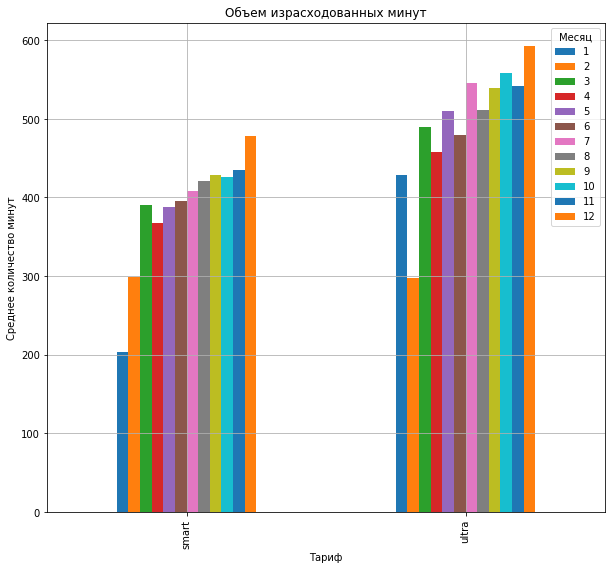

In [52]:
user_data.pivot_table(index = 'tariff_name', values = 'call_duration', columns = 'month', aggfunc = 'mean').plot(
    kind = 'bar', 
    figsize = (10,9), 
    grid = True
)
plt.xlabel('Тариф')
plt.ylabel('Среднее количество минут')
plt.legend(title = 'Месяц')
plt.title('Объем израсходованных минут')
plt.show()

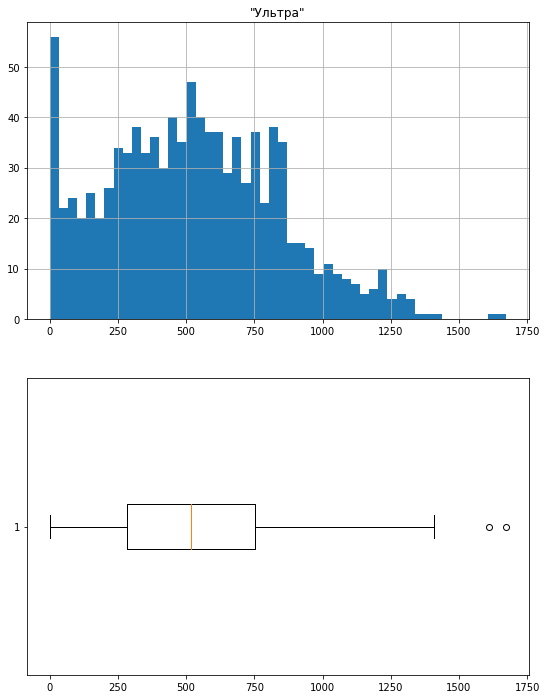

In [53]:
x = user_data[user_data.tariff_name == 'ultra']['call_duration']
plt.figure(figsize=(9, 12))
plt.subplot(2,1,1)
plt.grid()
plt.hist(x, bins=50)
plt.title('"Ультра"')
plt.subplot(2,1,2)
plt.boxplot(x, vert=False)
plt.show()

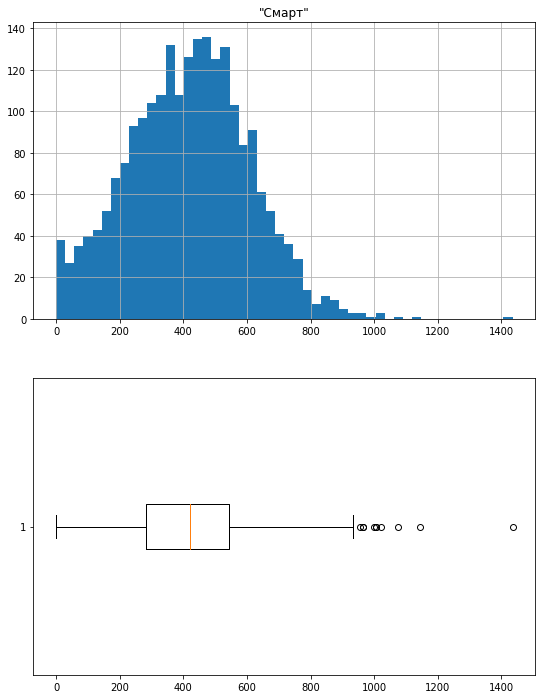

In [54]:
x = user_data[user_data.tariff_name == 'smart']['call_duration']
plt.figure(figsize=(9, 12))
plt.subplot(2,1,1)
plt.grid()
plt.hist(x, bins=50)
plt.title('"Смарт"')
plt.subplot(2,1,2)
plt.boxplot(x, vert=False)
plt.show()

Оба распределения стремятся к нормальному, распределение по тарифу "Ультра" более шумное из-за меньшего количества данных. Тариф "Ультра" скошен вправо, что указывает на больший разброс значений  
Рассчитаем медиану, среднее, СКО

In [55]:
user_data.pivot_table(index='tariff_name', values='call_duration', aggfunc=['median', 'mean', 'var', 'std'])

,median,mean,var,std
,call_duration,call_duration,call_duration,call_duration
tariff_name,,,,
smart,422,417.934948,36219.315784,190.313730
ultra,518,526.623350,100873.633397,317.606098


В среднем пользователи тарифа "Ультра" тратят больше минут, нежели пользователи тарифа "Смарт". При этом, как мы увидели на гистограмме, у тарифа "Ультра" действительно больше дисперсия и стандартное отклонение.  
Важно обратить внимание на тот факт, что пользователи тарифа "Смарт" практически полностью тратят свой месячный лимит на минуты

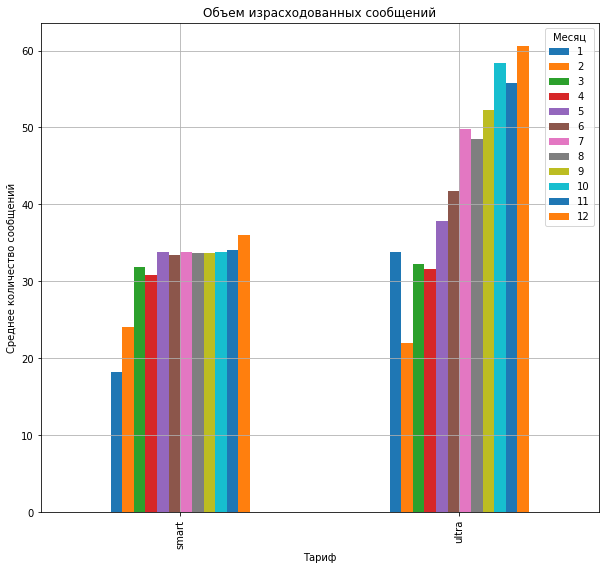

In [56]:
user_data.pivot_table(index = 'tariff_name', values = 'message_count', columns = 'month', aggfunc = 'mean').plot(
    kind = 'bar', 
    figsize = (10,9), 
    grid = True
)
plt.xlabel('Тариф')
plt.ylabel('Среднее количество сообщений')
plt.legend(title='Месяц')
plt.title('Объем израсходованных сообщений')
plt.show()

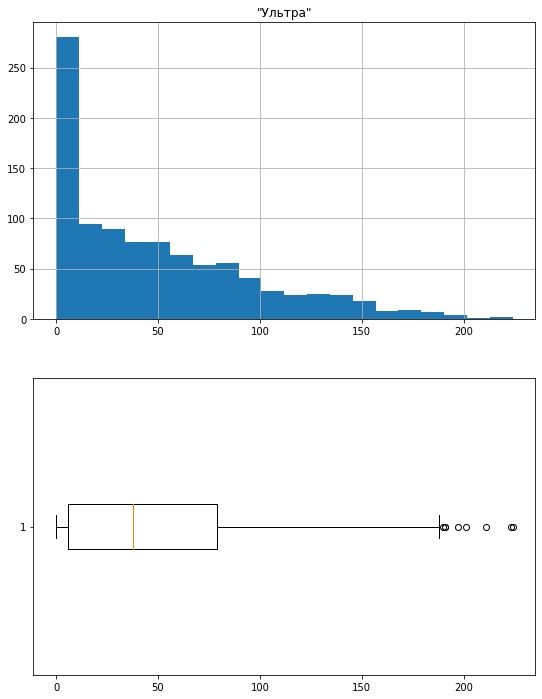

In [57]:
x = user_data[user_data.tariff_name == 'ultra']['message_count']
plt.figure(figsize=(9, 12))
plt.subplot(2,1,1)
plt.grid()
plt.hist(x, bins=20)
plt.title('"Ультра"')
plt.subplot(2,1,2)
plt.boxplot(x, vert=False)
plt.show()

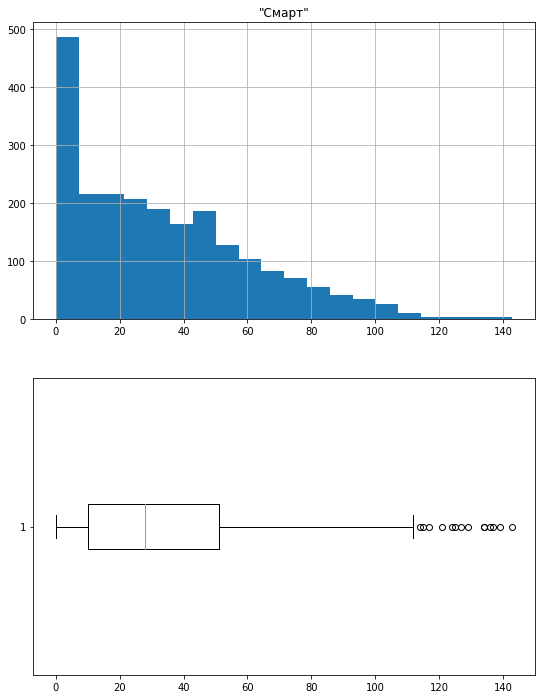

In [58]:
x = user_data[user_data.tariff_name == 'smart']['message_count']
plt.figure(figsize=(9, 12))
plt.subplot(2,1,1)
plt.grid()
plt.hist(x, bins=20)
plt.title('"Смарт"')
plt.subplot(2,1,2)
plt.boxplot(x, vert=False)
plt.show()

Самые частые значения у обоих тарифов - нули. Вероятно из-за того, что эпоха смс сообщений проходит, и все больше людей пользуются мессенджерами. В остальном распределения также стремятся к нормальным, разброс значений по тарифу "Ультра" будет выше

In [59]:
user_data.pivot_table(index='tariff_name', values='message_count', aggfunc=['median', 'mean', 'var', 'std'])

,median,mean,var,std
,message_count,message_count,message_count,message_count
tariff_name,,,,
smart,28,33.384029,796.812958,28.227876
ultra,38,49.363452,2285.266143,47.804457


Пользователи тарифа "Ультра" шлют больше сообщений. Действительно, дисперсия и СКО по этому тарифу выше, нежели у тарифа "Смарт"

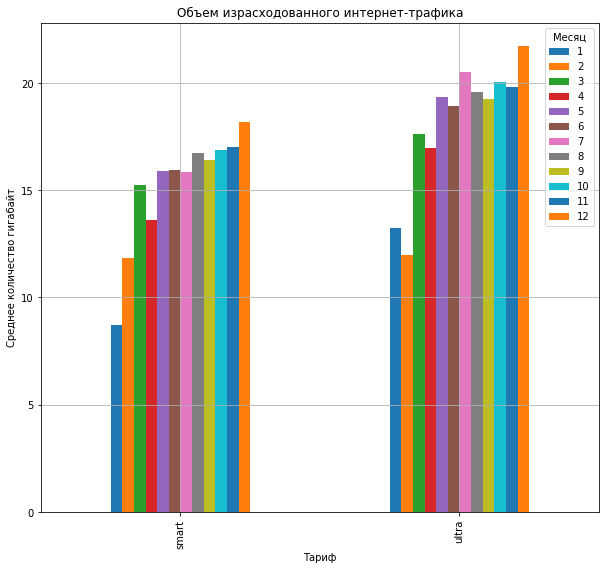

In [60]:
user_data.pivot_table(index = 'tariff_name', values = 'gb_used', columns = 'month', aggfunc = 'mean').plot(
    kind = 'bar', 
    figsize = (10,9), 
    grid = True
)
plt.xlabel('Тариф')
plt.ylabel('Среднее количество гигабайт')
plt.legend(title='Месяц')
plt.title('Объем израсходованного интернет-трафика')
plt.show()

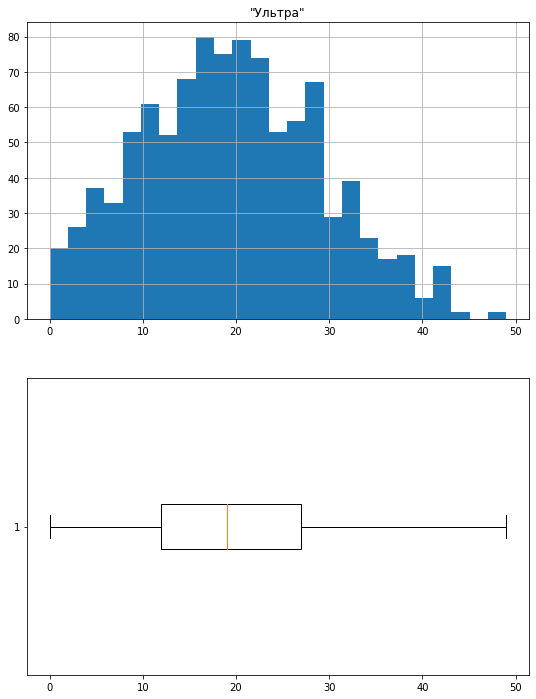

In [61]:
x = user_data[user_data.tariff_name == 'ultra']['gb_used']
plt.figure(figsize=(9, 12))
plt.subplot(2,1,1)
plt.grid()
plt.hist(x, bins=25)
plt.title('"Ультра"')
plt.subplot(2,1,2)
plt.boxplot(x, vert=False)
plt.show()

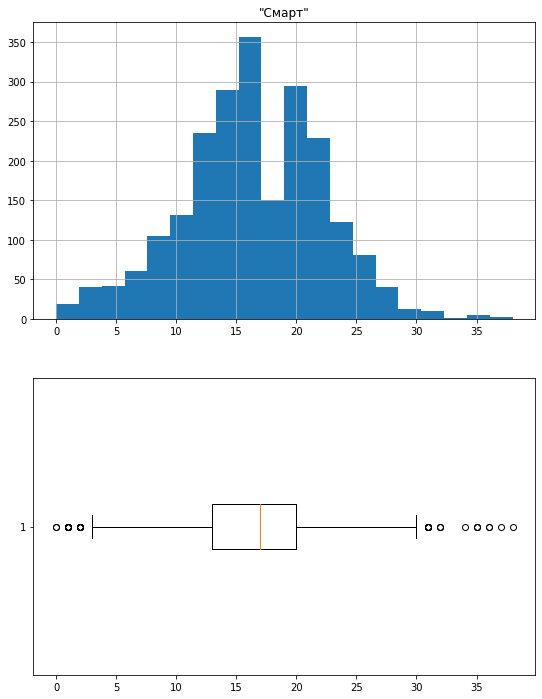

In [62]:
x = user_data[user_data.tariff_name == 'smart']['gb_used']
plt.figure(figsize=(9, 12))
plt.subplot(2,1,1)
plt.grid()
plt.hist(x, bins=20)
plt.title('"Смарт"')
plt.subplot(2,1,2)
plt.boxplot(x, vert=False)
plt.show()

In [63]:
user_data.pivot_table(index='tariff_name', values='gb_used', aggfunc=['median', 'mean', 'var', 'std'])

,median,mean,var,std
,gb_used,gb_used,gb_used,gb_used
tariff_name,,,,
smart,17,16.328847,33.028705,5.747061
ultra,19,19.494416,97.091686,9.853511


Интернет-трафик пользователи обоих тарифов тратят примерно одинаково. Разброс значений все так же больше у тарифа "Ультра".  
Важно отметить, что в среднем каждый пользователь тарифа "Смарт" выходит за рамки лимита по количеству гигабайт в месяц, за счет чего и идет выгода компании с данного тарифа

### Выводы

По результатам проведенного исследовательского анализа можно утверждать, что пользователи тарифа "Ультра" в среднем тратят больше минут, сообщений и интернет-трафика. Кроме того мы обнаружили, что пользователи обоих тарифов шлют мало сообщений.  
Несмотря на подавляющее количество клиентов с тарифом "Смарт" (приблизительно 7 из 10 клиентов), в среднем каждый из них выходит за рамки тарифного плана по количеству гигабайт в месяц.

## Проверка гипотез

В этой части работы мы проверим две гипотезы, указанные в задании

**Гипотеза №1** - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются

**Нулевая гипотеза** - средние выручки пользователей тарифов «Ультра» и «Смарт» **равны**  
**Альтернативная гипотеза** - средние выручки пользователей тарифов «Ультра» и «Смарт» **различаются**

Для этого создадим два массива данных - в один мы включим все значения столбца `income` для тарифа **Smart**, в другую соответственно - значения тарифа **Ultra**  
Уровень значимости примем равным **5%**

In [64]:
smart_income = user_data.query('tariff_name == "smart"')['income']
ultra_income = user_data.query('tariff_name == "ultra"')['income']

alpha = 0.05

results = st.ttest_ind(ultra_income, smart_income, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


In [65]:
user_data.pivot_table(index='tariff_name', values='income', aggfunc='mean')

,income
tariff_name,
smart,1289.973531
ultra,2070.152284


Средние значения выручки отличаются почти в два раза. При этом средняя выручка с клиента тарифа **Ultra** немногим больше ежемесячной платы, в то время как средняя выручка с клиента тарифа **Смарт** в два раза больше ежемесячной платы. Из-за нехватки услуг в рамках тарифа, пользователь тарифа **Smart** скорее всего заплатит больше, чем простая абонентская плата

**Гипотеза №2** - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Нулевая гипотеза** - средняя выручка пользователей из Москвы равна выручке пользователей из других регионов  
**Альтернативная гипотеза** - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов 

Для начала добавим в нашу сводную таблицу города пользователей из таблицы `users`

In [66]:
user_data = user_data.merge(users[['user_id', 'city']], on = 'user_id', how='left')
user_data.head(10)

,user_id,month,call_duration,message_count,gb_used,tariff_name,income,city
0,1000,5,159,22,3,ultra,1950,Краснодар
1,1000,6,172,60,23,ultra,1950,Краснодар
2,1000,7,340,75,14,ultra,1950,Краснодар
3,1000,8,408,81,14,ultra,1950,Краснодар
4,1000,9,466,57,15,ultra,1950,Краснодар
5,1000,10,350,73,15,ultra,1950,Краснодар
6,1000,11,338,58,15,ultra,1950,Краснодар
7,1000,12,333,70,10,ultra,1950,Краснодар
8,1001,11,430,0,18,smart,1150,Москва
9,1001,12,414,0,14,smart,550,Москва


In [67]:
moscow = user_data.query('city == "Москва"')['income']
region = user_data.query('city != "Москва"')['income']

alpha = 0.05

results = st.ttest_ind(moscow, region, equal_var = False)

results.pvalue

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


In [68]:
def det_region(city):
    if city == 'Москва': return 'Москва'
    else: return 'Другой регион'
    
user_data['region'] = user_data['city'].apply(det_region)
user_data.pivot_table(index='region', values='income', aggfunc='median')

,income
region,
Другой регион,1583
Москва,1750


t-тест не дал нам возможность отвергнуть нулевую гипотезу - **выручка по Москве статистически не отличается от выручки других городов России**

## Общие выводы

Проведя анализ выборки клиентов компании "Мегалайн" и сравнив между собой два тарифа данной компании (а именно тарифы «Ультра» и «Смарт») мы пришли к следующим результатам:  
* Пользователи тарифа «Ультра» чаще шлют сообщения, совершают вызовы и тратят больше интернет-трафика, но пользователи тарифа «Смарт» чаще выходят за лимиты тарифа
* Выручка с  тарифа «Ультра» выше, чем выручка с тарифа «Смарт» - разница почти в два раза. Но при этом пользователи тарифа «Смарт» в среднем платят в два раза больше своей абонентской платы
* Доходы от услуг связи по Москве практически не отличаются от доходов по регионам  
Так как больше выручки приносит тариф «Ультра», именно его стоит развивать компании «Мегалайн», тем более что в данной выборке отношение количества клиентов тарифа «Ультра» к количеству клиентов тарифа «Смарт» приблизительно 30:70. Вероятно стоит акцентировать внимание на увеличенном лимите интернет-трафика, который оба вида клиентов тратят примерно одинаково, но которого недостает клиентам тарифа «Смарт»